<h1 style="color:red">Tensorflow & Keras</h1>

In [1]:
import numpy as np
from numpy.random import seed, choice
import matplotlib.pyplot as plt

Conceptos: Descenso Gradiente visto en el Módulo 4 hay 3 variantes: 
1. Descenso de Gradiente Estocástico: Calcula el error para cada observación y actualiza. También se le conoce como *Online* ML Algo
2. Descenso de Gradiente Batch. Calcula error para cada observación pero actualiza parámetros hasta que acaba todas las observaciones. Un ciclo de esto se la Epoch
3. Descenso de Gradiente Mini-Batch. Divide el Training Data Set en pequeños batches que se usan para actualizar los coeficientes. Se suman los gradientes para cada mini-batch. 


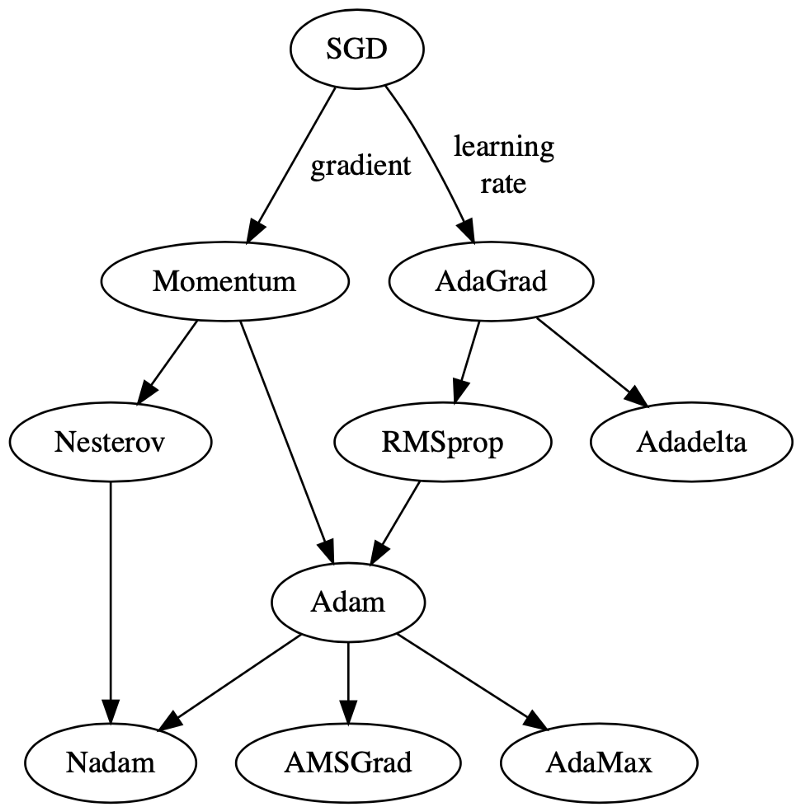

Deep Learning recomienda Mini-Batch. Pequeños valores de Batch convergen más rápido al costo de tener ruido en el proceso. 
Grandes valores de Batch se tardan en converge pero son más precisos. Batch size que se recomienda es 32.  

# Cargando tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

# Redes Neuronales para Clasificación

### Importar datos

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [30]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
X_train.shape[0]

60000

In [33]:
categories={
    0:"playeras",
    1:"pantalones",
    2:"pullover",
    3:"vestido",
    4: "abrigo",
    5: "sandalias",
    6:"camisa",
    7:"tennis",
    8:"bolsa",
    9:"Botas",
}

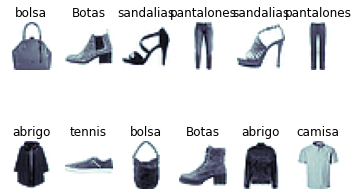

In [34]:
seed(314)
N, *_=y_train.shape
indices=np.arange(N,dtype=int)
test_ix=choice(indices,12)

fig,ax=plt.subplots(2,6)
ax=ax.ravel()
for axi,ix in zip(ax,test_ix):
    axi.imshow(X_train[ix],cmap="bone_r")
    cat=categories[y_train[ix]]
    axi.set_title(cat)
    axi.axis("off")

In [7]:
X_train.reshape((X_train.shape[0],28,28,1))

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [35]:
X_train=X_train.reshape((X_train.shape[0],28,28,1))
X_test=X_test.reshape((X_test.shape[0],28,28,1))


In [36]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
#one hot encode target values
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [40]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_train.shape

(60000, 10)

# Función para descargar datos

In [96]:
def cargar_datos():
    #se descargan datos
    (trainX,trainY),(testX,testY)=fashion_mnist.load_data()
    #le hacemos reshape para tener un sólo canal
    trainX=trainX.reshape((trainX.shape[0],28,28,1))
    testX=testX.reshape((testX.shape[0],28,28,1))
    #one hot encode target values
    trainY=tf.keras.utils.to_categorical(trainY)
    testY=tf.keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY

In [97]:
trainX,trainY,testX,testY=cargar_datos()

# Normalizar datos

In [43]:
X_train.max()

255

In [44]:
X_train.min()

0

In [46]:
X_train.astype('float32')/255.0

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [47]:
def escalar_imagenes(train,test):
    #convertimos enteros a flotantes
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    #normalizamos al rango 0-1
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    #regresa imagenes normalizadas
    return train_norm, test_norm

In [98]:
trainX,testX=escalar_imagenes(trainX,testX)

# Una primer Feed-Forward Neural Network


In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, Flatten

## Paso 1: Definiendo la Arquitectura de la Red

In [119]:
#X son matrices de 28x28
Xin=Input(shape=(28,28,1))
#lo pasamos a una dimension
X=Flatten()(Xin)
X=Dense(350,activation="relu")(X)
X=Dense(100,activation="relu")(X)
X=Dense(10,activation="softmax")(X)
model=Model(inputs=Xin,outputs=X)

In [120]:
model.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 350)               274750    
_________________________________________________________________
dense_115 (Dense)            (None, 100)               35100     
_________________________________________________________________
dense_116 (Dense)            (None, 10)                1010      
Total params: 310,860
Trainable params: 310,860
Non-trainable params: 0
_________________________________________________________________


In [53]:
#flatten. imagenes se pasan a un vector 
28*28

784

In [54]:
#primer capa
#pesos que se generan para cada entrada para cada neurona
784*350

274400

In [55]:
274750-274400

350

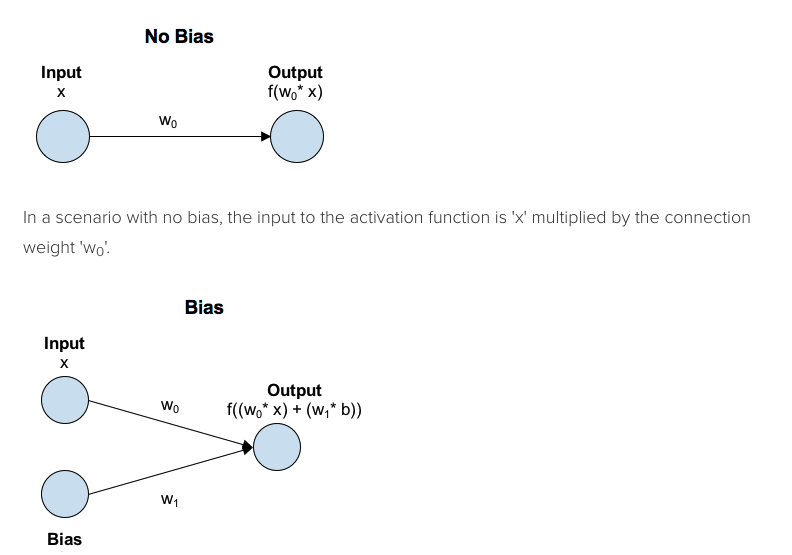

In [56]:
#pesos de las 350 neuronas mapeadas a cada una de l00 neuronas en la siguiente capa
350*100

35000

In [57]:
#peso de los 100 nodos de segunda capa oculta
35000+100

35100

In [58]:
#peso de las 100 neuronas a las últimsa 10 neuronas
100*10

1000

In [59]:
#peso de esas salidas
1000+10

1010

In [60]:
1010+35100+350+274400

310860

# Paso 2: compilando el modelo

In [ ]:
#Descenso de Gradiente Stochastico

In [72]:
from tensorflow.keras.optimizers import SGD

In [121]:
#BIEN
opt = SGD(lr=0.01)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [73]:
#ERROR
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [122]:
def define_model():
    #X son matrices de 28x28
    Xin=Input(shape=(28,28,1))
    #lo pasamos a una dimension
    X=Flatten()(Xin)
    X=Dense(350,activation="relu")(X)
    X=Dense(100,activation="relu")(X)
    X=Dense(10,activation="softmax")(X)
    model=Model(inputs=Xin,outputs=X)
    opt = SGD(lr=0.01)
    model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    
    return model

In [123]:
model=define_model()

# Paso 3: Entrenar modelo

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Training with large minibatches is bad for your health.<br>More importantly, it&#39;s bad for your test error.<br>Friends dont let friends use minibatches larger than 32. <a href="https://t.co/hxx2rGhIG1">https://t.co/hxx2rGhIG1</a></p>&mdash; Yann LeCun (@ylecun) <a href="https://twitter.com/ylecun/status/989610208497360896?ref_src=twsrc%5Etfw">April 26, 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [65]:
X_train.shape

(60000, 28, 28, 1)

In [67]:
X_train[0].shape

(28, 28, 1)

In [100]:
trainX.shape

(60000, 28, 28, 1)

In [124]:
model.fit(x=trainX,y=trainY,epochs=3,batch_size=30)

Epoch 1/3
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9471 - accuracy: 0.7016
Epoch 2/3
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4879 - accuracy: 0.8273
Epoch 3/3
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4368 - accuracy: 0.8458


In [70]:
from sklearn.model_selection import KFold

In [105]:
def evaluate_model(dataX,dataY,n_folds=5):
    #generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #preparar cross_validation
    kfold=KFold(n_folds,shuffle=True,random_state=1)
    # para cada fold
    for train_ix, test_ix in kfold.split(dataX):
        #definimos model
        model=define_model()
        #seleccionamos filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history=model.fit(trainX,trainY,epochs=3,batch_size=32,validation_data=(testX,testY),verbose=0)
        #evaluamos
        _, acc=model.evaluate(testX,testY,verbose=0)
        print('>%.3f'%(acc*100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

# Resumen de epochs

In [125]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
            plt.subplot(211)
            plt.title('Classification Accuracy')
            plt.plot(histories[i].history['accuracy'], color='blue', label='train')
            plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
            plt.show()

# Todo Junto

In [130]:
def cargar_datos():
    #se descargan datos
    (trainX,trainY),(testX,testY)=fashion_mnist.load_data()
    #le hacemos reshape para tener un sólo canal
    trainX=trainX.reshape((trainX.shape[0],28,28,1))
    testX=testX.reshape((testX.shape[0],28,28,1))
    #one hot encode target values
    trainY=tf.keras.utils.to_categorical(trainY)
    testY=tf.keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY

def escalar_imagenes(train,test):
    #convertimos enteros a flotantes
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    #normalizamos al rango 0-1
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    #regresa imagenes normalizadas
    return train_norm, test_norm

def define_model():
    #X son matrices de 28x28
    Xin=Input(shape=(28,28,1))
    #lo pasamos a una dimension
    X=Flatten()(Xin)
    X=Dense(350,activation="relu")(X)
    X=Dense(100,activation="relu")(X)
    X=Dense(10,activation="softmax")(X)
    model=Model(inputs=Xin,outputs=X)
    #ERROR
    #model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             #loss="sparse_categorical_crossentropy",
             #metrics=["accuracy"])
    opt = SGD(lr=0.01)

    model.compile(optimizer=opt,
            loss="categorical_crossentropy", 
            metrics=["accuracy"])
    return model
    #return model


    
def evaluate_model(dataX,dataY,n_folds=5):
    #generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #preparar cross_validation
    kfold=KFold(n_folds,shuffle=True,random_state=1)
    # para cada fold
    for train_ix, test_ix in kfold.split(dataX):
        #definimos model
        model=define_model()
        #seleccionamos filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        history=model.fit(trainX,trainY,epochs=3,batch_size=32,validation_data=(testX,testY),verbose=0)
        #evaluamos
        _, acc=model.evaluate(testX,testY,verbose=0)
        print('>%.3f'%(acc*100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
            plt.subplot(211)
            plt.title('Classification Accuracy')
            plt.plot(histories[i].history['accuracy'], color='blue', label='train')
            plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()


def correr_todo():
    #cargue datos
    trainX,trainY,testX,testY=cargar_datos()
    #escala
    trainX,testX=escalar_imagenes(trainX,testX)
    #creamos modelo
    model=define_model()
    #evaluar modelo
    _,histories=evaluate_model(trainX,trainY)
    #graficar accuracy por epochs
    summarize_diagnostics(histories)
    

>85.058
>84.925
>84.367
>84.775
>84.250


<ipython-input-130-4905c6850903>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


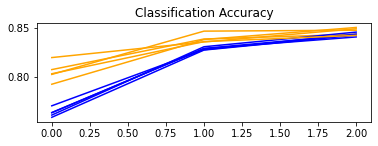

In [131]:
#Corremos todos
correr_todo()

# Tarea 3

1. Encontrar una estructura de Red Diferente[ (sin cambiar el optimizador), sólo se puede cambiar, número de capas, función de activación y/o número de neuronas] que tenga un mejor Accuracy Promedio que el visto en clase para los 5 folds (85)